In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [15]:
emote_df = pd.read_csv("../datasets/train/train_emoticon.csv")
emote_df

# 1. split the string into individual characters
# 2. run a correlation matrix on each category
# check number of distinct emotes

# Split the string into individual characters
emote_df['characters'] = emote_df['input_emoticon'].apply(list)

# Create new columns for each character
for i in range(len(emote_df['characters'][0])):
    emote_df[f'c_{i+1}'] = emote_df['characters'].apply(lambda x: x[i] if len(x) > i else '')
l1 = [f'c_{i+1}' for i in range(len(emote_df['characters'][0]))]
edf = emote_df[l1].apply(lambda x: [ord(i) for i in x])
edf.insert(13, 'label', emote_df['label'])
emote_df[['input_emoticon', 'label']].head(25)

input_emoticon  label
0   😛🛐😻😑😣🙠🙯🚼😒🙼😑🙯😣      0
1   🛐😑😪😛🚼🙯😣🚅😑🙯😹😣🙼      0
2   😛🙯😑🚡😣🚼🛐🙲😣🙯🛑😑🙼      0
3   😛🚼🛐🙐😣🙯😑🙪😑🙼🛆😣🙯      1
4   🛐🚟🚼😛🙋😑😣🙯😹🙯😑😣🙼      1
5   😑😣🚧😛🚜🚼🙯🛐🙼😣😑🙕🙯      1
6   😣😑🙯🚼🛐🚥😬😛😣🚄😑🙼🙯      0
7   🚡🚼😑🛐🚔🙯😛😣😑🙯🛓🙼😣      0
8   🛐😛🛜😑🚼😚😣🙯😣😑🙯🚠🙼      0
9   🙯😑🙷🛐🚼😣😛😍😿🙯🙼😑😣      1
10  😣🙯🛐😑😛🚼🙚😍🙯🙼😣😑😸      0
11  😛😯🚼🙯😑🛐😻😣🙼🙯😹😑😣      1
12  😑🙯😛🛐🚼🙒🚙😣🙯😣😑🙼😬      1
13  😿😣🚼🚴😛😑🙯🛐😣🙯😑😴🙼      1
14  😛🛐🚼🚂🙯😦😣😑🙯😑😣🙼🙨      1
15  🛐🚼🙯🛝😑😉😛😣🙒😣🙼😑🙯      0
16  😣🙯😵😑😛🚃🚼🛐😣🙯🚜🙼😑      0
17  😛😑🙯🚼🛆🛐😘😣😣😊🙼😑🙯      0
18  🚟😣😑🛐😌🚼😛🙯🙯😣😑😿🙼      1
19  😛🚼😑😣🙧🛐🙯😉🚍😣😑🙯🙼      0
20  🛓🛐😣🚼🙯🚥😑😛😢😣🙯😑🙼      1
21  😣😑🚵😛🚼🛐🙯😊🙼😣🙯😑😩      0
22  🛐🙯😛🚼😣😬😠😑🙯🙼😣😑🛡      0
23  🛐🙯🚜😣🚼😑😰😛😑🙯🚏🙼😣      1
24  🚼😛🙯😣🚗🛐🙸😑😣🙼🙯🚌😑      1

In [16]:
emo = emote_df['input_emoticon'].to_list()

In [17]:
import demoji

# Ensure emoji data is updated
demoji.download_codes()

# List of emojis to convert
emoji_list = ["😀", "🔥", "❤️", "😂", "🚀"]

# Convert each emoji to text description
text_list = [demoji.replace_with_desc(emoji) for emoji in emoji_list]

# Printing the results
for emoji, text in zip(emoji_list, text_list):
    print(f"Emoji: {emoji} -> Text: {text}")

Emoji: 😀 -> Text: :grinning face:
Emoji: 🔥 -> Text: :fire:
Emoji: ❤️ -> Text: :red heart:
Emoji: 😂 -> Text: :face with tears of joy:
Emoji: 🚀 -> Text: :rocket:


/tmp/ipykernel_30645/3712595372.py:4: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


In [24]:
for i in range(13) :
    emote_df[f'c_{i+1}_text'] = emote_df[f'c_{i+1}'].apply(lambda x: demoji.replace_with_desc(x)[1:-1] if x != '' else x)

In [35]:
emote_df.iloc[90]

input_emoticon                              🙯🚚😑😛🛌😣🚼🛐🙩🙯😣🙼😑
label                                                   0
characters        [🙯, 🚚, 😑, 😛, 🛌, 😣, 🚼, 🛐, 🙩, 🙯, 😣, 🙼, 😑]
c_1                                                     🙯
c_2                                                     🚚
c_3                                                     😑
c_4                                                     😛
c_5                                                     🛌
c_6                                                     😣
c_7                                                     🚼
c_8                                                     🛐
c_9                                                     🙩
c_10                                                    🙯
c_11                                                    😣
c_12                                                    🙼
c_13                                                    😑
c_1_text                                                 
c_2_text      

In [36]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load pre-trained model and tokenizer (e.g., BERT)
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModel.from_pretrained('bert-base-uncased')


/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [56]:
def text2embed(text) :
    # Tokenize the input text and convert to input IDs and attention masks
    inputs = tokenizer(text, return_tensors='pt')

    # Generate embeddings (hidden states)
    with torch.no_grad():
        outputs = model(**inputs)

    # The embeddings are in the last hidden state
    # Shape: (batch_size, sequence_length, hidden_size)
    embeddings = outputs.last_hidden_state

    # To get a single embedding for the sentence, we typically pool the embeddings:
    # Mean pooling across the sequence length axis (axis=1)
    sentence_embedding = torch.mean(embeddings, dim=1)

    # print(sentence_embedding)
    return sentence_embedding.numpy().reshape(-1)

In [57]:
embed = text2embed('who is gay')

In [113]:
X = pd.DataFrame(columns=[f'c_{i+1}_embed' for i in range(13)])

In [114]:
X.head()

Empty DataFrame
Columns: [c_1_embed, c_2_embed, c_3_embed, c_4_embed, c_5_embed, c_6_embed, c_7_embed, c_8_embed, c_9_embed, c_10_embed, c_11_embed, c_12_embed, c_13_embed]
Index: []

In [117]:
texts = []
for i in range(13) :
    for text in emote_df[f'c_{i+1}_text'] :
        texts.append(text)
texts = list(set(texts))

In [118]:
dict_text2bed = {f'{text}' : text2embed(text) for text in texts}

In [125]:
import numpy as np

# Assuming embedding dimension is 768
embedding_dim = 768
num_columns = 13

# Initialize a list to store rows of combined embeddings
combined_embeddings = []

# Iterate over each row in the dataframe
for idx, row in emote_df.iterrows():
    row_embeddings = []
    
    # Iterate over the 13 columns and get the embedding for each
    for i in range(num_columns):
        column_text = row[f'c_{i+1}_text']
        
        # If the text is not empty, fetch its embedding, else use a zero vector
        if column_text != '':
            embedding = dict_text2bed.get(column_text, np.zeros(embedding_dim))
        else:
            embedding = np.zeros(embedding_dim)
        
        # Append the embedding to the row list
        row_embeddings.append(embedding)
    
    # Concatenate the embeddings for the row
    combined_embeddings.append(np.hstack(row_embeddings))

# Convert the list of rows into a NumPy array
X = np.vstack(combined_embeddings)

# X is now a NumPy array where each row has 13 * 768 dimensions


In [126]:
X.shape

(7080, 9984)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## XGBOOST

In [128]:
import numpy as np
from xgboost import XGBClassifier

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [129]:
X_train.shape, y_train.shape

((5664, 9984), (5664,))

In [130]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:42:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [135]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [136]:
def plot_confusion_matrix(y_true, y_pred, classes, title=None, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=cmap)
    plt.show()

def get_classification_report(y_true, y_pred):
    return classification_report(y_true, y_pred, target_names=['Class 0', 'Class 1'])

In [137]:
y_pred = xgb_model.predict(X_test)

report = get_classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

     Class 0       0.77      0.76      0.77       719
     Class 1       0.76      0.77      0.76       697

    accuracy                           0.77      1416
   macro avg       0.77      0.77      0.77      1416
weighted avg       0.77      0.77      0.77      1416



AttributeError: module 'matplotlib.pyplot' has no attribute 'pyplot'

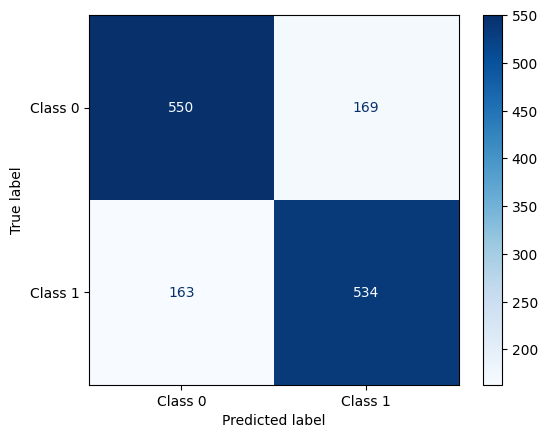

In [146]:
plot_confusion_matrix(y_test, y_pred, classes = ['Class 0', 'Class 1'], title='Train Confusion Matrix')